In [21]:
import os
import math
import pandas as pd
import pickle

from sklearn.utils import shuffle
from tqdm import tqdm

In [22]:
people = ['Dennis+Schwartz', 'James+Berardinelli', 'Scott+Renshaw', 'Steve+Rhodes']
features = ['subj', 'rating', 'label.3class', 'label.4class', 'rating']

data = []
for person in tqdm(people):
    data_path = f'../data/raw/scale_4ppl/{person}'
    data_entry = {}
    data_entry['user'] = person
    for feature in features:
        temp = []
        with open(f'{data_path}/{feature}.{person}', 'r') as f:
            lines = f.readlines()
            for line in lines:
                entry = line.replace('\n','')
                temp.append(entry)
        f.close()

        data_entry[feature] = temp

    data_entry = pd.DataFrame(data_entry)

    data.append(data_entry)
data = pd.concat(data)
data = data.rename(columns={'subj': 'text', 'person': 'user'})

# data['clean'] = [clean_text(x) for x in data['subj']]

data['rating_rt'] = [round(float(x)*100) for x in data['rating']]
data['rating_imdb'] = [max(1, math.ceil(float(x)*10)) for x in data['rating']]
data['rating_lb'] = [max(0.5, math.ceil(float(x)*10)/2) for x in data['rating']]

reddit = pd.read_csv('../data/raw/reddit/ratings.csv', usecols=['user', 'text', 'rating_lb'])
reddit['rating'] = reddit['rating_lb'] / 5
reddit['rating_rt'] = reddit['rating_lb'] * 20
reddit['rating_imdb'] = reddit['rating_lb'] * 2

data = pd.concat([data, reddit]).reset_index(drop=True)


data['label.10class'] = (data['rating_imdb'] - 1).astype(int)

data = shuffle(data)
data.to_csv('../data/processed.csv', index=None)

100%|██████████| 4/4 [00:00<00:00, 38.92it/s]


In [23]:
data

,user,text,rating,label.3class,label.4class,rating_rt,rating_imdb,rating_lb,label.10class
5318,PrisonerLudwig,Good,0.7,NaN,NaN,70.0,7.0,3.5,6
4968,Steve+Rhodes,"when i went into see crimson tide , i knew it ...",0.9,2,3,90.0,9.0,4.5,8
3817,Steve+Rhodes,"but with it's thin narrative , based on mitche...",0.5,1,1,50.0,5.0,2.5,4
2635,Scott+Renshaw,director : wes craven . mpaa rating : pg ( mil...,0.5,1,1,50.0,5.0,2.5,4
3019,Scott+Renshaw,screenplay : mike werb . director : charles ru...,0.7,2,2,70.0,7.0,3.5,6
...,...,...,...,...,...,...,...,...,...
4201,Steve+Rhodes,i read that it is a sequel to the year my voic...,0.6,1,2,60.0,6.0,3.0,5
4180,Steve+Rhodes,if you are like me and have never heard of thi...,0.6,1,2,60.0,6.0,3.0,5
1977,James+Berardinelli,perhaps disney should take a lesson from write...,0.75,2,2,75.0,8.0,4.0,7
2485,Scott+Renshaw,screenplay : rodney vaccaro and aline brosh mc...,0.4,0,1,40.0,4.0,2.0,3


In [8]:
data = pd.read_csv('../data/scale/processed.csv')
data

,id,label.3class,label.4class,rating,subj,person,clean,rating_rt,rating_imdb,rating_lb,rating_10class
0,29420,0,0,0.1,"in my opinion , a movie reviewer's most import...",Dennis+Schwartz,in my opinion movie reviewer most important ta...,10,1,0.5,1
1,17219,0,0,0.2,"you can watch this movie , that is based on a ...",Dennis+Schwartz,you can watch this movie that is based on sci ...,20,2,1.0,2
2,18406,0,0,0.2,"this is asking a lot to believe , and though i...",Dennis+Schwartz,this is asking lot to believe and though it is...,20,2,1.0,2
3,18648,0,0,0.2,no heroes and no story are the main attributes...,Dennis+Schwartz,no hero and no story are the main attribute fo...,20,2,1.0,2
4,20021,0,0,0.2,"this is not an art movie , yet i saw it an art...",Dennis+Schwartz,this is not an art movie yet saw it an art hou...,20,2,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
5001,7470,2,3,0.9,the conventional wisdom is that movie sequels ...,Steve+Rhodes,the conventional wisdom is that movie sequel a...,90,9,4.5,9
5002,7853,2,3,0.9,nicolas roeg's mesmerizing 1971 film walkabout...,Steve+Rhodes,nicolas roeg mesmerizing 1971 film walkabout e...,90,9,4.5,9
5003,8309,2,3,0.9,the movie air force one should require a docto...,Steve+Rhodes,the movie air force one should require doctor ...,90,9,4.5,9
5004,8912,2,3,0.9,""" well , jones , at least you haven't forgotte...",Steve+Rhodes,well jones at least you haven forgotten how to...,90,9,4.5,9


In [13]:
data['label.10class'].value_counts()

6    991
5    927
4    859
7    691
3    630
2    400
8    289
1    131
9     52
0     36
Name: label.10class, dtype: int64

<AxesSubplot: >

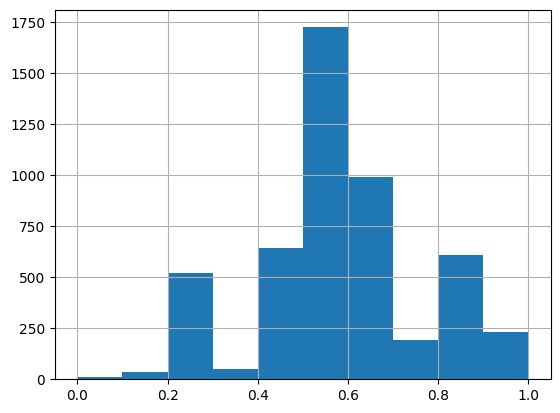

In [11]:
data['rating'].hist(bins=10)

<Axes: >

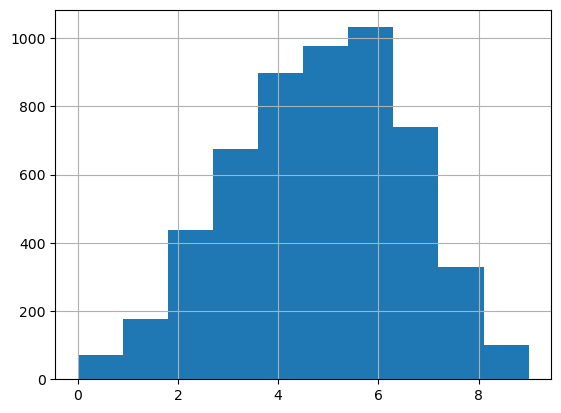

In [18]:
data['label.10class'].hist()

In [13]:
data.sample(5)

,id,label.3class,label.4class,rating,subj,person,clean,rating_100,rating_imdb,rating_lb
3730,21088,1,1,0.5,writers and directors figure that the more the...,Steve+Rhodes,writer and director figure that the more the a...,50,5,2.5
1573,9833,1,2,0.6,"one night stand , director mike figgis' follow...",James+Berardinelli,one night stand director mike figgis follow up...,60,6,3.0
2349,12390,0,0,0.2,director : frederik duchau . mpaa rating : g (...,Scott+Renshaw,director frederik duchau mpaa rating some scar...,20,2,1.0
3922,7183,1,1,0.5,"for me , australia will always be the land of ...",Steve+Rhodes,for me australia will always be the land of ko...,50,5,2.5
369,17662,1,1,0.5,"tango is a romantic musical , supposedly influ...",Dennis+Schwartz,tango is romantic musical supposedly influence...,50,5,2.5


# Data Transformation

In [4]:
import re
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    stemmer = WordNetLemmatizer()

    # Remove all the special characters
    document = re.sub(r'\W', ' ', text)

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)

    return document

In [ ]:
import nltk
nltk.download('wordnet')

In [ ]:
# data['clean'] = [clean_text(x) for x in data['subj']]

In [14]:
data[['subj', 'clean']].head()

,subj,clean
0,"in my opinion , a movie reviewer's most import...",in my opinion movie reviewer most important ta...
1,"you can watch this movie , that is based on a ...",you can watch this movie that is based on sci ...
2,"this is asking a lot to believe , and though i...",this is asking lot to believe and though it is...
3,no heroes and no story are the main attributes...,no hero and no story are the main attribute fo...
4,"this is not an art movie , yet i saw it an art...",this is not an art movie yet saw it an art hou...


In [ ]:
nltk.download('stopwords')

In [15]:
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidf.fit_transform(data['clean']).toarray()

In [17]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.12114127,
        0.        ],
       [0.        , 0.        , 0.16967528, ..., 0.        , 0.        ,
        0.        ]])

# Full pipeline

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

classifier = LinearRegression()
pipe = make_pipeline(tfidf, classifier, verbose=True)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['clean'], data['rating'], test_size=0.1)

In [37]:
pipe.fit(X_train, y_train)
pickle.dump(pipe, open('model/pipe.pickle', 'wb'))

[Pipeline] ... (step 1 of 2) Processing tfidfvectorizer, total=   1.0s
[Pipeline] .. (step 2 of 2) Processing linearregression, total=   0.1s


## Load pipeline

In [38]:
pipe = pickle.load(open('model/pipe.pickle', 'rb'))

In [39]:
y_pred = pipe.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')

MAE: 0.10994234558850066
MAPE: 0.2288616270264375
RMSE: 0.1387955321706542


In [33]:
to_rate = 'very good, incredible'
platform = 'letterboxd'

result = pipe.predict([to_rate])[0]
if platform == 'letterboxd':
    print(math.ceil(result*10)/2)
elif platform == 'imdb':
    print(math.ceil(result*10))
else:
    print(math.ceil(result*100))

2.5


# MINE

In [ ]:
class Classifier(nn.Module):
    def __init__(self, embedding_size, hidden_size, num_class):
        super().__init__()

        self.input_layer = nn.Linear(embedding_size, hidden_size)
        self.hidden_layer = nn.Linear(hidden_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, num_class)

        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()

    def forward(self, x):
        x = self.relu(self.input_layer(x))
        x = self.relu(self.hidden_layer(x))
        x = self.output_layer(x)
        # x = self.softmax(x)  # not used, because CrossEntropyLoss() does it
        return x